In [1]:
# Import packages needed for calculations
import pandas as pd
from scipy.stats import kruskal
from scipy.stats import ttest_ind
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read in the Excel file
df=pd.read_excel('Health_Insurance_Dataset.xlsx')

In [2]:
# Keep only the first 1,339 rows (Python is 0-based)
df = df.iloc[:1339]

In [3]:
# Convert BMI and Charges to numeric data types for calculations
df['bmi'] = pd.to_numeric(df['bmi'])
df['charges'] = pd.to_numeric(df['charges'])

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges,Level,score
0,19.0,female,27.900,0.0,yes,southwest,16884.92400,B,72.0
1,18.0,male,33.770,1.0,no,southeast,1725.55230,C,69.0
2,28.0,male,33.000,3.0,no,southeast,4449.46200,B,90.0
3,33.0,male,22.705,0.0,no,northwest,21984.47061,A,47.0
4,32.0,male,28.880,0.0,no,northwest,3866.85520,C,76.0


In [5]:
# Drop rows with missing smoker, bmi, or charges data
df_clean = df.dropna(subset=['smoker', 'bmi', 'charges'])

In [6]:
df_clean.shape

(1338, 9)

In [7]:
# Print the stats for Charges column
df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

<Axes: xlabel='charges', ylabel='Count'>

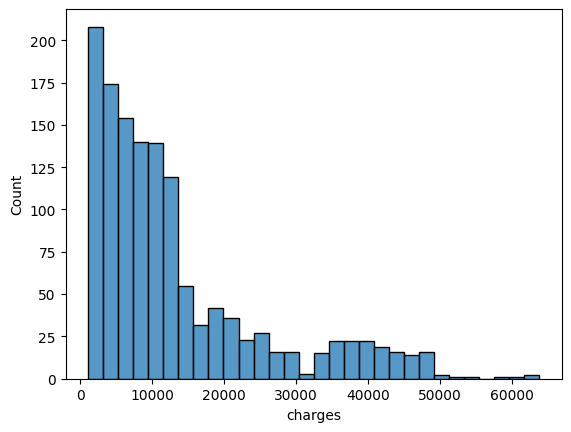

In [8]:
# Display a histogram of Charges
sns.histplot(data=df, x='charges')

In [9]:
# Print the stats for BMI column
df['bmi'].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

<Axes: xlabel='bmi', ylabel='Count'>

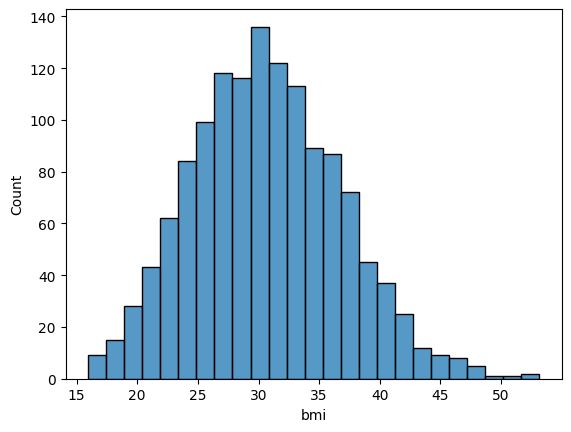

In [10]:
# Display a histogram of BMI
sns.histplot(data=df, x='bmi')

In [11]:
# Count values in Smoker column
df.value_counts('smoker')

smoker
no     1064
yes     274
Name: count, dtype: int64

<Axes: xlabel='smoker', ylabel='count'>

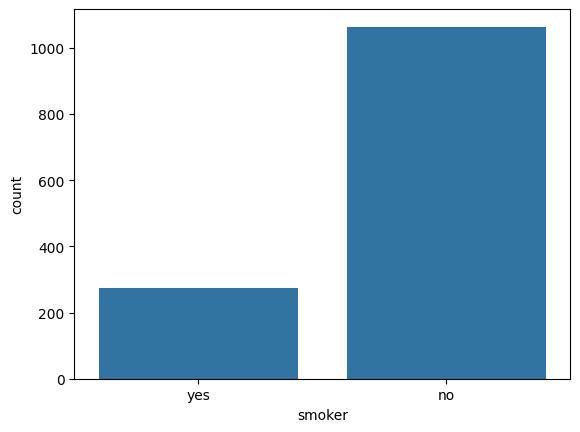

In [12]:
# Display a barchart for non-smokers vs smokers
sns.countplot(data=df, x='smoker')

In [13]:
# Count values in Region column
df.value_counts('region')

region
southeast    364
northwest    325
southwest    325
northeast    324
Name: count, dtype: int64

<Axes: xlabel='region', ylabel='count'>

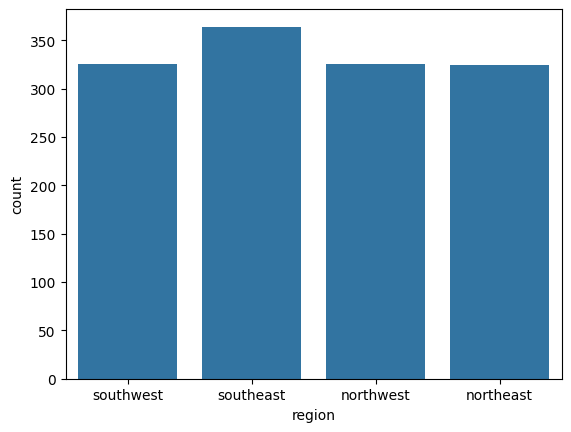

In [14]:
# Display a barchart for count of individuals in each region
sns.countplot(data=df, x='region')

<Axes: xlabel='bmi', ylabel='charges'>

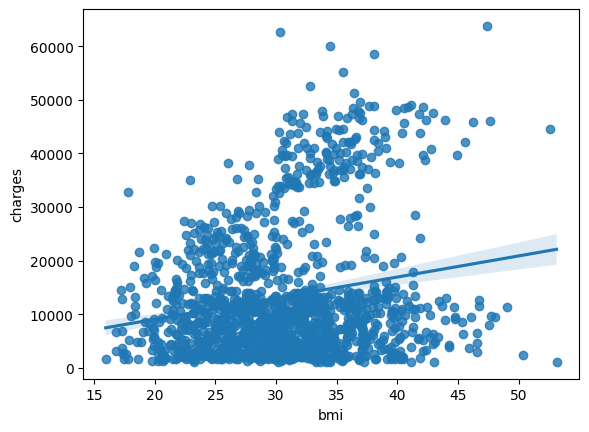

In [15]:
# Scatterplot to show correlation between BMI and charges
sns.regplot(data=df, x='bmi', y='charges')

In [16]:
# Calculate Pearson correlation between 'bmi' and 'charges'
correlation = df['bmi'].corr(df['charges'])

# Print the correlation
print("Correlation between BMI and Charges:", correlation)


Correlation between BMI and Charges: 0.19834096883362884


<Axes: xlabel='smoker', ylabel='charges'>

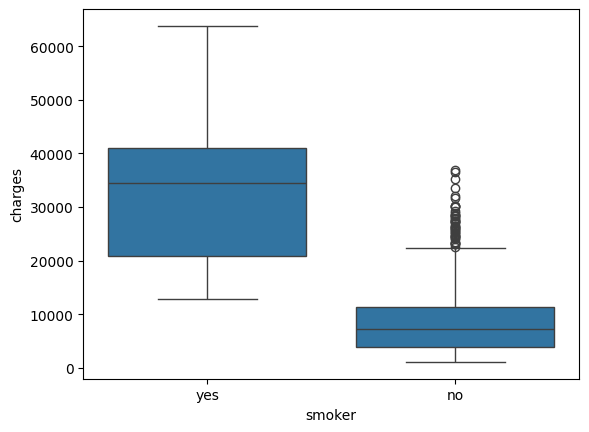

In [17]:
# Boxplot to show comparison data between smoker and charges
sns.boxplot(data=df, x='smoker', y='charges')

<Axes: xlabel='region', ylabel='charges'>

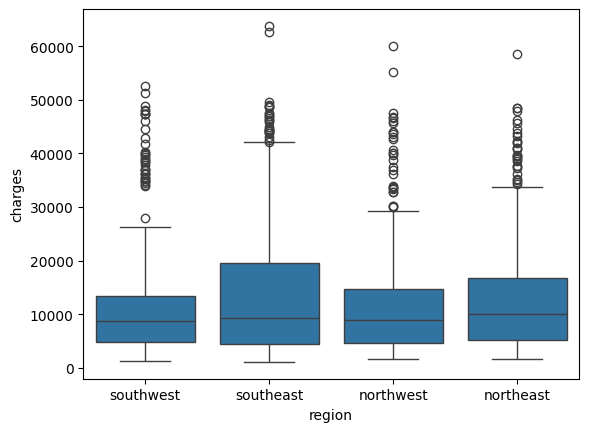

In [18]:
# Boxplot to show comparison data between region and charges
sns.boxplot(data=df, x='region', y='charges')

<Axes: xlabel='smoker', ylabel='bmi'>

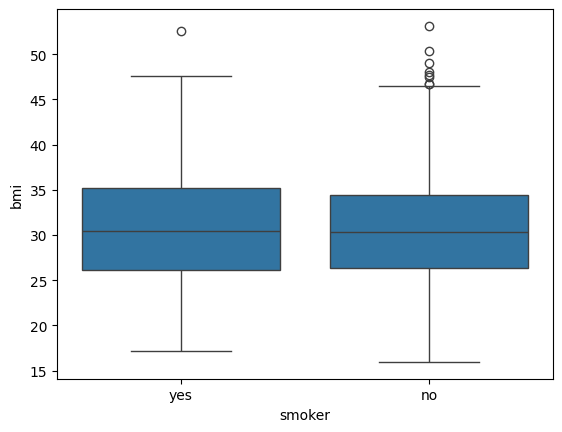

In [19]:
# Boxplot to show comparison data between smoker and bmi
sns.boxplot(data=df, x='smoker', y='bmi')

<Axes: xlabel='smoker', ylabel='charges'>

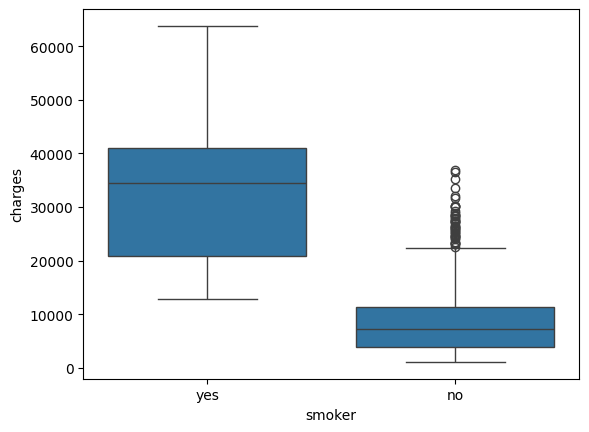

In [20]:
# Boxplot to show comparison data between smoker and bmi
sns.boxplot(data=df, x='smoker', y='charges')

In [21]:
# Split into smoker and non-smoker groups
smokers = df[df['smoker'] == 'yes']['charges']
non_smokers = df[df['smoker'] == 'no']['charges']

In [22]:
# Run independent samples t-test (Welch’s t-test for unequal variances)
t_stat, p_value = ttest_ind(smokers, non_smokers, equal_var=False)

In [23]:
# Output results
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 32.751887766341824
P-value: 5.88946444671698e-103


In [24]:
# Ensure 'charges' is numeric and drop rows with missing values
df['charges'] = pd.to_numeric(df['charges'])
df = df.dropna(subset=['charges', 'region'])

In [25]:
# Group charges by region
regions = df['region'].unique()
grouped_charges = [df[df['region'] == region]['charges'] for region in regions]

In [26]:
# Run the Kruskal-Wallis H-test
h_stat, p_value = kruskal(*grouped_charges)

In [27]:
# Print results
print("Kruskal-Wallis H-statistic:", h_stat)
print("P-value:", p_value)

Kruskal-Wallis H-statistic: 4.734181215658743
P-value: 0.19232908072121044
